In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from scipy import stats
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse, aic
import pickle
from statsmodels.tsa.stattools import kpss

In [3]:
data = pd.read_excel('C:/Users/moham/Desktop/TEST/ARDL M.xlsx', index_col='years')
#data

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

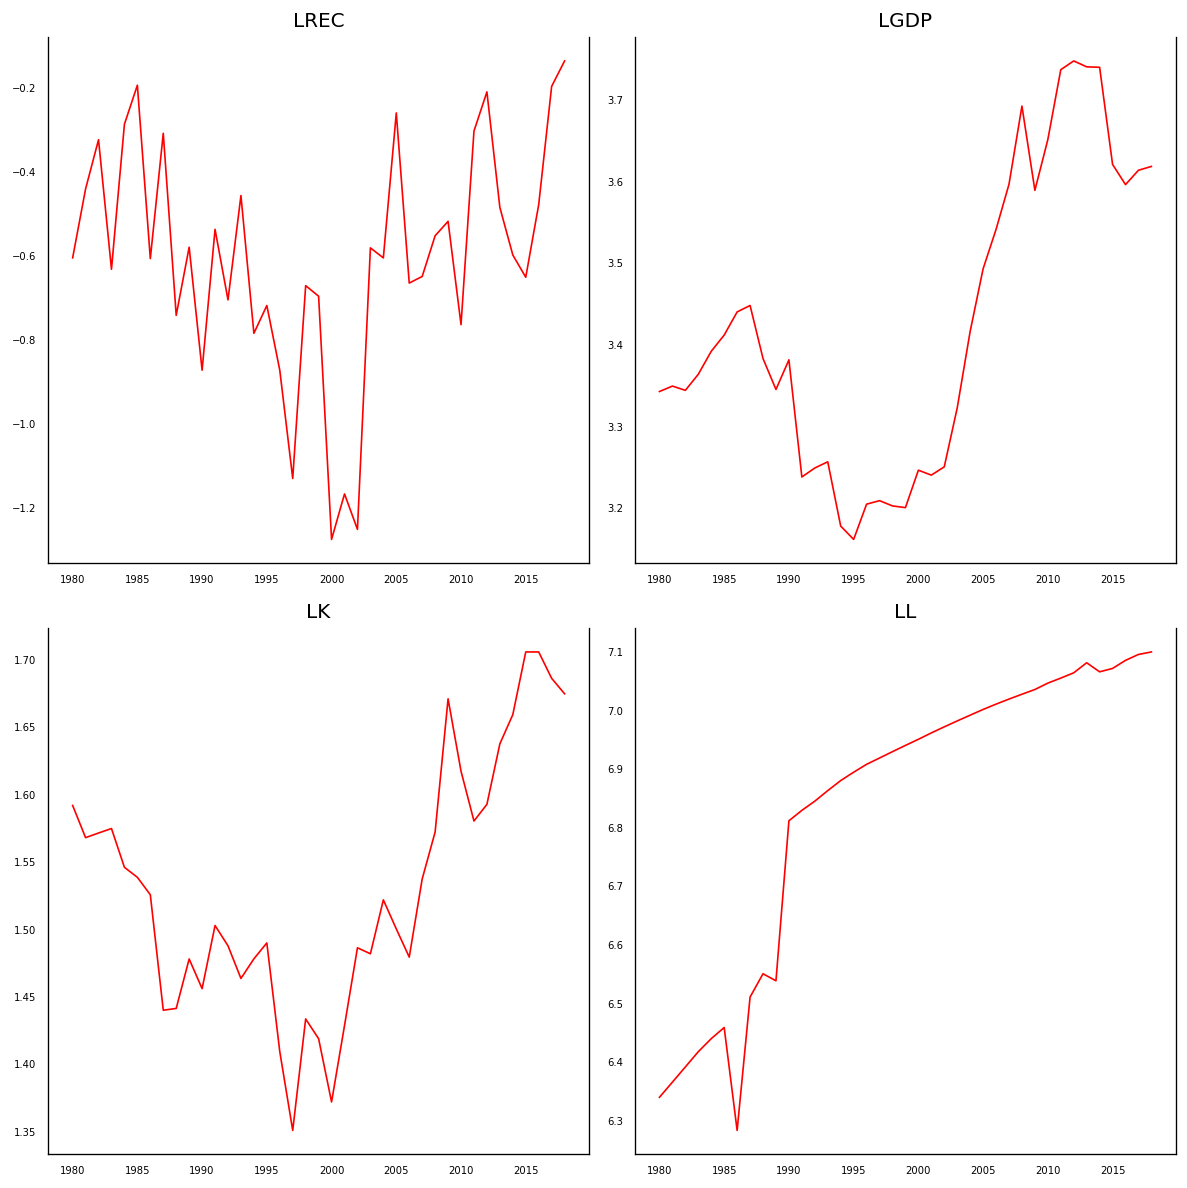

In [5]:
# Plot
fig, axes = plt.subplots(nrows=2, ncols=2, dpi=120, figsize=(10,10))
for i, ax in enumerate(axes.flatten()): 
    dt = data[data.columns[i]]
    ax.plot(dt, color='red', linewidth=1)
    # Decorations
    ax.set_title(data.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

# Check for Stationarity 

In [6]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 

In [7]:
# ADF Test on each column
for name, column in data.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "LREC" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.2999
 No. Lags Chosen       = 0
 Critical value 1%     = -3.616
 Critical value 5%     = -2.941
 Critical value 10%    = -2.609
 => P-Value = 0.0149. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "LGDP" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.3995
 No. Lags Chosen       = 3
 Critical value 1%     = -3.633
 Critical value 5%     = -2.949
 Critical value 10%    = -2.613
 => P-Value = 0.5825. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "LK" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Sig

LGDP , LK , LL are not stationary
LREC stationary

In [23]:
print ('Results of KPSS Test LGDP Serie')
kpsstest = kpss(data['LGDP'], regression='c', nlags=3)
kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
for key,value in kpsstest[3].items():
    kpss_output['Critical Value (%s)'%key] = value
print (kpss_output)

Results of KPSS Test LGDP Serie
Test Statistic           0.597040
p-value                  0.022905
#Lags Used               3.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


In [22]:
print ('Results of KPSS Test LREC Serie')
kpsstest = kpss(data['LREC'], regression='c', nlags=0)
kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
for key,value in kpsstest[3].items():
    kpss_output['Critical Value (%s)'%key] = value
print (kpss_output)

Results of KPSS Test LREC Serie
Test Statistic           0.458860
p-value                  0.051784
#Lags Used               0.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


In [24]:
print ('Results of KPSS Test LK Serie')
kpsstest = kpss(data['LK'], regression='c', nlags=0)
kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
for key,value in kpsstest[3].items():
    kpss_output['Critical Value (%s)'%key] = value
print (kpss_output)

Results of KPSS Test LK Serie
Test Statistic           1.582414
p-value                  0.010000
#Lags Used               0.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


C:\Users\moham\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [25]:
print ('Results of KPSS Test LL Serie')
kpsstest = kpss(data['LL'], regression='c', nlags=0)
kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
for key,value in kpsstest[3].items():
    kpss_output['Critical Value (%s)'%key] = value
print (kpss_output)

Results of KPSS Test LL Serie
Test Statistic           3.328048
p-value                  0.010000
#Lags Used               0.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


C:\Users\moham\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [27]:
# 1st difference
data_differenced = data.diff().dropna()

In [28]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in data_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "LREC" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.0309
 No. Lags Chosen       = 0
 Critical value 1%     = -3.621
 Critical value 5%     = -2.944
 Critical value 10%    = -2.61
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "LGDP" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.2918
 No. Lags Chosen       = 0
 Critical value 1%     = -3.621
 Critical value 5%     = -2.944
 Critical value 10%    = -2.61
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "LK" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Tes

In [30]:
print ('Results of KPSS Test 1 st lag of LGDP Serie')
kpsstest = kpss(data_differenced['LGDP'], regression='c', nlags=0)
kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
for key,value in kpsstest[3].items():
    kpss_output['Critical Value (%s)'%key] = value
print (kpss_output)

Results of KPSS Test LGDP Serie
Test Statistic           0.220094
p-value                  0.100000
#Lags Used               0.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


C:\Users\moham\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [31]:
print ('Results of KPSS Test 1 st lag of LK Serie')
kpsstest = kpss(data_differenced['LK'], regression='c', nlags=1)
kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
for key,value in kpsstest[3].items():
    kpss_output['Critical Value (%s)'%key] = value
print (kpss_output)

Results of KPSS Test 1 st lag of LK Serie
Test Statistic           0.270825
p-value                  0.100000
#Lags Used               1.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


C:\Users\moham\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [32]:
print ('Results of KPSS Test 1 st lag of LL Serie')
kpsstest = kpss(data_differenced['LK'], regression='c', nlags=0)
kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
for key,value in kpsstest[3].items():
    kpss_output['Critical Value (%s)'%key] = value
print (kpss_output)

Results of KPSS Test 1 st lag of LL Serie
Test Statistic           0.270705
p-value                  0.100000
#Lags Used               0.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


C:\Users\moham\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [39]:
data_differenced1= data_differenced.copy()
data_differenced1
data_differenced1.drop(['LREC'], axis=1, inplace=True)

In [40]:
data_differenced1

,LGDP,LK,LL
years,,,
1981,0.006657,-0.023829,0.025815
1982,-0.005231,0.003422,0.025955
1983,0.019659,0.003322,0.025987
1984,0.028119,-0.028732,0.022318
1985,0.019874,-0.007415,0.018969
1986,0.028326,-0.012920,-0.175563
1987,0.007891,-0.085547,0.227553
1988,-0.064976,0.001308,0.039759
1989,-0.037782,0.036650,-0.012015


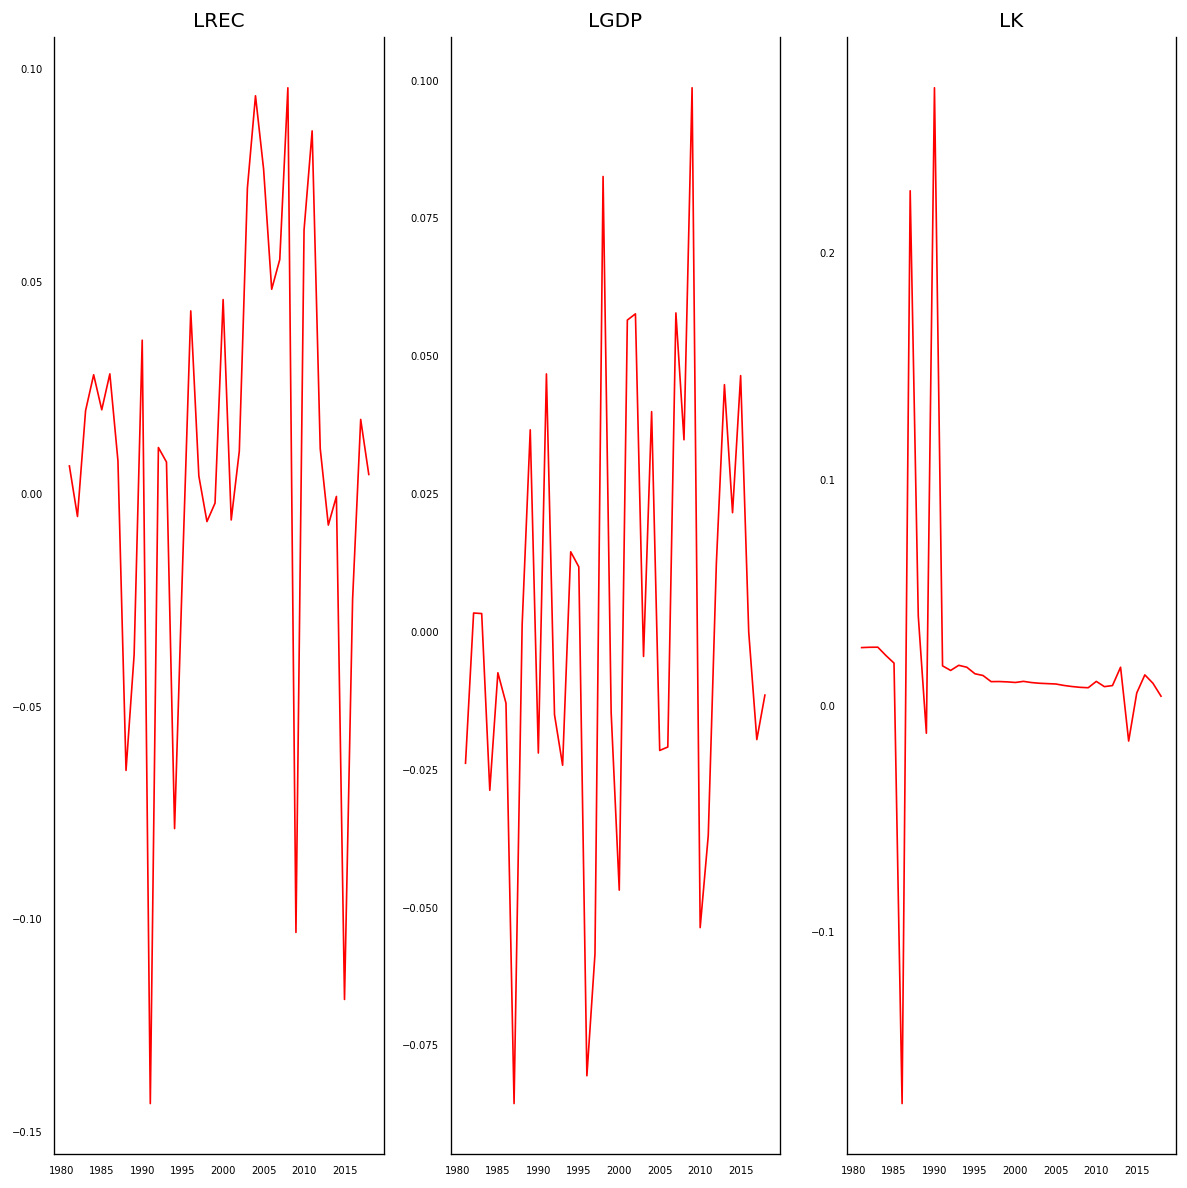

In [48]:
# Plot
fig, axes = plt.subplots(nrows=1, ncols=3, dpi=120, figsize=(10,10))
for i, ax in enumerate(axes.flatten()): 
    dt = data_differenced1[data_differenced1.columns[i]]
    ax.plot(dt, color='red', linewidth=1)
    # Decorations
    ax.set_title(data.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [50]:
# split data into train and test. We will need this later for VAR analysis
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]

In [51]:
rawData = data.copy(deep=True)


In [52]:
# obtain the lag P for VAR
rawData = rawData.dropna()
model = VAR(rawData) #recall that rawData is w/o difference operation
for i in [1,2]:
    result = model.fit(i)
    try:
        print('Lag Order =', i)
        print('AIC : ', result.aic)
        print('BIC : ', result.bic)
        print('FPE : ', result.fpe)
        print('HQIC: ', result.hqic, '\n')
    except:
        continue

Lag Order = 1
AIC :  -20.808270009218486
BIC :  -19.946382556730917
FPE :  9.24164184464251e-10
HQIC:  -20.501617042123954 

Lag Order = 2
AIC :  -20.610670729916233
BIC :  -19.043291139235368
FPE :  1.164622157795951e-09
HQIC:  -20.058096008815916 



C:\Users\moham\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [53]:
x = model.select_order(maxlags=2)
x.summary()

,AIC,BIC,FPE,HQIC
0,-14.97,-14.80,3.139e-07,-14.91
1,-20.69*,-19.82*,1.043e-09*,-20.38*
2,-20.61,-19.04,1.165e-09,-20.06


Result: The lag-order p = 1 on the basis of Akaike Information Criterion (AIC), (BIC), (FPE), (HQ)

In [54]:
model = VAR(train)
model_fitted = model.fit(1)

C:\Users\moham\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [55]:
#Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic
#The value of this statistic can vary between 0 and 4. 
#The closer it is to the value 2, then there is no significant serial correlation. 
#The closer to 0, there is a positive serial correlation, 
#and the closer it is to 4 implies negative serial correlation.


from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(data.columns, out):
    print(col, ':', round(val, 2))

LREC : 2.34
LGDP : 1.61
LK : 2.16
LL : 2.77


Result: There is no significant correlation between in the residuals

In [56]:
model = VAR(train)
model_fitted = model.fit(1)
#get the lag order
lag_order = model_fitted.k_ar
print(lag_order)

1


C:\Users\moham\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [57]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=lag_order +1  #becuase we got this value before. We are not suppose to add 1 to it
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

O = grangers_causation_matrix(train, variables = train.columns)  

In [58]:
O

,LREC_x,LGDP_x,LK_x,LL_x
LREC_y,1.0000,0.0091,0.0000,0.5207
LGDP_y,0.3884,1.0000,0.0161,0.0318
LK_y,0.6011,0.0000,1.0000,0.0191
LL_y,0.5887,0.8336,0.8188,1.0000


In [60]:
import os 
os.chdir('C:/Users/moham/Desktop/TEST')
os.getcwd()

'C:\\Users\\moham\\Desktop\\TEST'